# Business Understanding

Your company is expanding into aviation. This analysis identifies the safest aircraft types for investment, based on historical accident data.

# Data Understanding

We use civil aviation accident data from 1962–2023 from the National Transportation Safety Board. We begin by inspecting the data and understanding key variables.

# Data Cleaning and Preparation

Here we handle missing values, drop unnecessary columns, and clean the dataset for analysis.

# Data Analysis and Key Insights

We group by aircraft type, engine type, and purpose of flight to understand patterns in accident frequency and fatality rates.

# Business Recommendations

Based on the analysis and visualizations, we present three key business recommendations to support safe investment decisions.

# Conclusion and Next Steps

We summarize the findings, highlight the safest aircraft types, and suggest directions for further analysis or data collection.

In [1]:
# Step 1:Upload dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import os

# Print the current working directory
print("Current directory:", os.getcwd())

# List all files and folders in the current directory
print("Files and folders:", os.listdir())

Current directory: /home/a930b839-1f99-49a9-8f35-875d3ea0697f
Files and folders: ['.pythonstartup.py', '.local', '.npm', '.vimrc', 'Aviation (National Safety Board).ipynb', 'Untitled Folder', '.anaconda', '.config', '.virtualenvs', '.jupyter', 'Untitled.ipynb', '.ipynb_checkpoints', '.gitconfig', 'README.ipynb', '.profile', 'anaconda_projects', '.bashrc', '.cache', '.ipython', 'Aviation_Data-dataset project phase 1.csv']


In [4]:
import pandas as pd

aviation_df = pd.read_csv("Aviation_Data-dataset project phase 1.csv", index_col=0)  # Optional: use index_col=0 to drop default index
aviation_df.head()

/tmp/ipykernel_489/1185577419.py:4: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_df = pd.read_csv("Aviation_Data-dataset project phase 1.csv", index_col=0)  # Optional: use index_col=0 to drop default index


,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [9]:
aviation_df = pd.read_csv("Aviation_Data-dataset project phase 1.csv", index_col=0)  # one folder up


/tmp/ipykernel_489/2197083519.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_df = pd.read_csv("Aviation_Data-dataset project phase 1.csv", index_col=0)  # one folder up


In [10]:
# Re-load with read_csv and specify index_col=0
# This tells pandas to use the first column as the index instead of creating a separate index column
aviation_df =pd.read_csv("Aviation_Data-dataset project phase 1.csv", index_col=0)

# Check the first few rows to confirm the column is gone
print(aviation_df.head())

               Investigation.Type Accident.Number  Event.Date  \
Event.Id                                                        
20001218X45444           Accident      SEA87LA080  10/24/1948   
20001218X45447           Accident      LAX94LA336   7/19/1962   
20061025X01555           Accident      NYC07LA005   8/30/1974   
20001218X45448           Accident      LAX96LA321   6/19/1977   
20041105X01764           Accident      CHI79FA064    8/2/1979   

                       Location        Country   Latitude  Longitude  \
Event.Id                                                               
20001218X45444  MOOSE CREEK, ID  United States        NaN        NaN   
20001218X45447   BRIDGEPORT, CA  United States        NaN        NaN   
20061025X01555    Saltville, VA  United States  36.922223 -81.878056   
20001218X45448       EUREKA, CA  United States        NaN        NaN   
20041105X01764       Canton, OH  United States        NaN        NaN   

               Airport.Code Airport.Nam

/tmp/ipykernel_489/3394275924.py:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_df =pd.read_csv("Aviation_Data-dataset project phase 1.csv", index_col=0)


In [11]:
# First, let's examine the data types and see what we're working with
print("Data types before cleaning:")
print(aviation_df.dtypes)
print("\n" + "="*50 + "\n")

# Check the shape of the dataframe
print(f"Dataset shape: {aviation_df.shape}")
print("\n" + "="*50 + "\n")

# Let's look at columns 6, 7, and 28 (the ones mentioned in the warning)
# Note: Python uses 0-based indexing, so column 6 is index 5, etc.
column_names = aviation_df.columns.tolist()
print("Column names and their indices:")
for i, col in enumerate(column_names):
    print(f"{i}: {col}")

print("\n" + "="*50 + "\n")



Data types before cleaning:
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status       

In [12]:
# Examine the problematic columns (6, 7, 28 from the warning)
if len(column_names) > 6:
    col_6 = column_names[5]  # 6th column (0-indexed)
    print(f"Column 6 ({col_6}) - Sample values:")
    print(aviation_df[col_6].value_counts().head(10))
    print(f"Data type: {aviation_df[col_6].dtype}")
    print()

if len(column_names) > 7:
    col_7 = column_names[6]  # 7th column (0-indexed)
    print(f"Column 7 ({col_7}) - Sample values:")
    print(aviation_df[col_7].value_counts().head(10))
    print(f"Data type: {aviation_df[col_7].dtype}")
    print()

if len(column_names) > 28:
    col_28 = column_names[27]  # 28th column (0-indexed)
    print(f"Column 28 ({col_28}) - Sample values:")
    print(aviation_df[col_28].value_counts().head(10))
    print(f"Data type: {aviation_df[col_28].dtype}")
    print()

print("="*50)
print("Looking for mixed data types in all columns...")

Column 6 (Latitude) - Sample values:
Latitude
332739N      19
335219N      18
32.815556    17
334118N      17
324934N      16
039405N      16
34.654444    15
393412N      14
391132N      14
335232N      14
Name: count, dtype: int64
Data type: object

Column 7 (Longitude) - Sample values:
Longitude
0112457W       24
1114342W       18
1151140W       17
-104.673056    17
1114840W       16
-112.0825      16
-111.728334    15
0010572W       15
-117.139444    15
-149.996389    14
Name: count, dtype: int64
Data type: object

Column 28 (Broad.phase.of.flight) - Sample values:
Broad.phase.of.flight
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Name: count, dtype: int64
Data type: object

Looking for mixed data types in all columns...


In [17]:
# Check for mixed data types in all columns
for col in aviation_df.columns:
    # Check if column has mixed types by looking for both numeric and string values
    sample_values = aviation_df[col].dropna().astype(str).head(100)
    has_numeric = any(val.replace('.', '').replace('-', '').isdigit() for val in sample_values if val != 'nan')
    has_text = any(not val.replace('.', '').replace('-', '').isdigit() for val in sample_values if val != 'nan' and val.strip() != '')
    
    if has_numeric and has_text:
        print(f"\nMixed types found in column: {col}")
        print(f"Sample values: {aviation_df[col].dropna().head(10).tolist()}")
        print(f"Current dtype: {aviation_df[col].dtype}")

print("="*50)
print("CLEANING THE DATA...")
print("="*50)


Mixed types found in column: Airport.Code
Sample values: ['N58', 'JAX', 'T72', '5G6', 'YIP', '49G', 'PDK', 'VNY', 'SOP', 'HPN']
Current dtype: object

Mixed types found in column: Model
Sample values: ['108-3', 'PA24-180', '172M', '112', '501', 'DC9', '180', '140', '401B', 'NAVION L-17B']
Current dtype: object

Mixed types found in column: Publication.Date
Sample values: ['19-09-1996', '26-02-2007', '12/9/2000', '16-04-1980', '19-09-2017', '6/11/2001', '1/1/1982', '1/1/1982', '1/1/1982', '1/1/1982']
Current dtype: object
CLEANING THE DATA...


In [20]:
# Create a copy of the dataframe for cleaning
aviation_clean = aviation_df.copy()

# 1. Clean Airport.Code column - should be string (airport codes)
print("Cleaning Airport.Code column...")
aviation_clean['Airport.Code'] = aviation_clean['Airport.Code'].astype(str)
aviation_clean['Airport.Code'] = aviation_clean['Airport.Code'].replace('nan', pd.NA)
print(f"Airport.Code cleaned - dtype: {aviation_clean['Airport.Code'].dtype}")

# 2. Clean Model column - should be string (aircraft models)
print("\nCleaning Model column...")
aviation_clean['Model'] = aviation_clean['Model'].astype(str)
aviation_clean['Model'] = aviation_clean['Model'].replace('nan', pd.NA)
print(f"Model cleaned - dtype: {aviation_clean['Model'].dtype}")

# 3. Clean Publication.Date column - convert to datetime
print("\nCleaning Publication.Date column...")
# First, let's see what date formats we have
print("Sample Publication.Date values before cleaning:")
print(aviation_clean['Publication.Date'].dropna().head(10).tolist())
# Convert to datetime, handling multiple date formats
aviation_clean['Publication.Date'] = pd.to_datetime(aviation_clean['Publication.Date'], 
                                                   format='mixed', 
                                                   errors='coerce',
                                                   dayfirst=False)

Cleaning Airport.Code column...
Airport.Code cleaned - dtype: object

Cleaning Model column...
Model cleaned - dtype: object

Cleaning Publication.Date column...
Sample Publication.Date values before cleaning:
['19-09-1996', '26-02-2007', '12/9/2000', '16-04-1980', '19-09-2017', '6/11/2001', '1/1/1982', '1/1/1982', '1/1/1982', '1/1/1982']


In [23]:
print(f"Publication.Date cleaned - dtype: {aviation_clean['Publication.Date'].dtype}")
print("Sample Publication.Date values after cleaning:")
print(aviation_clean['Publication.Date'].dropna().head(10).tolist())

print("\n" + "="*50)
print("CLEANING SUMMARY")
print("="*50)



Publication.Date cleaned - dtype: datetime64[ns]
Sample Publication.Date values after cleaning:
[Timestamp('1996-09-19 00:00:00'), Timestamp('2007-02-26 00:00:00'), Timestamp('2000-12-09 00:00:00'), Timestamp('1980-04-16 00:00:00'), Timestamp('2017-09-19 00:00:00'), Timestamp('2001-06-11 00:00:00'), Timestamp('1982-01-01 00:00:00'), Timestamp('1982-01-01 00:00:00'), Timestamp('1982-01-01 00:00:00'), Timestamp('1982-01-01 00:00:00')]

CLEANING SUMMARY


In [21]:
# Check data types after cleaning
print("Data types after cleaning:")
for col in ['Airport.Code', 'Model', 'Publication.Date']:
    print(f"{col}: {aviation_clean[col].dtype}")

print(f"\nDataset shape remains: {aviation_clean.shape}")

# Verify no more mixed type warnings by checking sample data
print("\nSample of cleaned data:")
print(aviation_clean[['Airport.Code', 'Model', 'Publication.Date']].head())

# Save the cleaned dataframe
print("\n" + "="*50)
print("Cleaned data is ready! You can now use 'aviation_clean' for your analysis.")
print("="*50)

Data types after cleaning:
Airport.Code: object
Model: object
Publication.Date: datetime64[ns]

Dataset shape remains: (90348, 30)

Sample of cleaned data:
               Airport.Code     Model Publication.Date
Event.Id                                              
20001218X45444         <NA>     108-3              NaT
20001218X45447         <NA>  PA24-180       1996-09-19
20061025X01555         <NA>      172M       2007-02-26
20001218X45448         <NA>       112       2000-12-09
20041105X01764         <NA>       501       1980-04-16

Cleaned data is ready! You can now use 'aviation_clean' for your analysis.


In [22]:
aviation_clean.dtypes

Investigation.Type                object
Accident.Number                   object
Event.Date                        object
Location                          object
Country                           object
Latitude                          object
Longitude                         object
Airport.Code                      object
Airport.Name                      object
Injury.Severity                   object
Aircraft.damage                   object
Aircraft.Category                 object
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
FAR.Description                   object
Schedule                          object
Purpose.of.flight                 object
Air.carrier                       object
Total.Fatal.Injuries             float64
Total.Serious.Injuries           float64
Total.Minor.Inju

In [27]:
print("="*60)
print("STEP 1: MISSING VALUES ANALYSIS")
print("="*60)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate missing values for each column
missing_data = aviation_clean.isnull().sum()
missing_percentage = (missing_data / len(aviation_clean)) * 100

# Create a DataFrame for better visualization
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percentage.values
}).sort_values('Missing_Percentage', ascending=False)

print("Missing Values Summary:")
print(missing_df[missing_df['Missing_Count'] > 0])



STEP 1: MISSING VALUES ANALYSIS
Missing Values Summary:
                    Column  Missing_Count  Missing_Percentage
19                Schedule          77766           86.073848
21             Air.carrier          73700           81.573471
18         FAR.Description          58325           64.555939
11       Aircraft.Category          58061           64.263736
6                Longitude          55975           61.954886
5                 Latitude          55966           61.944924
7             Airport.Code          40216           44.512330
8             Airport.Name          37644           41.665560
27   Broad.phase.of.flight          28624           31.681941
29        Publication.Date          16689           18.471909
23  Total.Serious.Injuries          13969           15.461327
24    Total.Minor.Injuries          13392           14.822686
22    Total.Fatal.Injuries          12860           14.233851
17             Engine.Type           8555            9.468942
28           R

In [49]:
#Create the missing_summary DataFrame
missing_summary = pd.DataFrame({
    'Column': aviation_clean.columns,
    'Missing_Count': aviation_clean.isnull().sum(),
    'Present_Count': aviation_clean.notnull().sum(),
    'Total_Count': len(aviation_clean)
})

# Calculate percentages
missing_summary['Missing_Percentage'] = (missing_summary['Missing_Count'] / missing_summary['Total_Count']) * 100
missing_summary['Present_Percentage'] = (missing_summary['Present_Count'] / missing_summary['Total_Count']) * 100

# Sort by missing count descending
missing_summary = missing_summary.sort_values('Missing_Count', ascending=False)

# Create figure and suptitle
fig.suptitle('DIAGRAM 1: Advanced Missing Data Analysis Matrix',
             fontsize=18, fontweight='bold', y=0.95)

# Create the columns_with_missing variable
columns_with_missing = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

# Top-left: Main heatmap
ax1 = axes[0, 0]

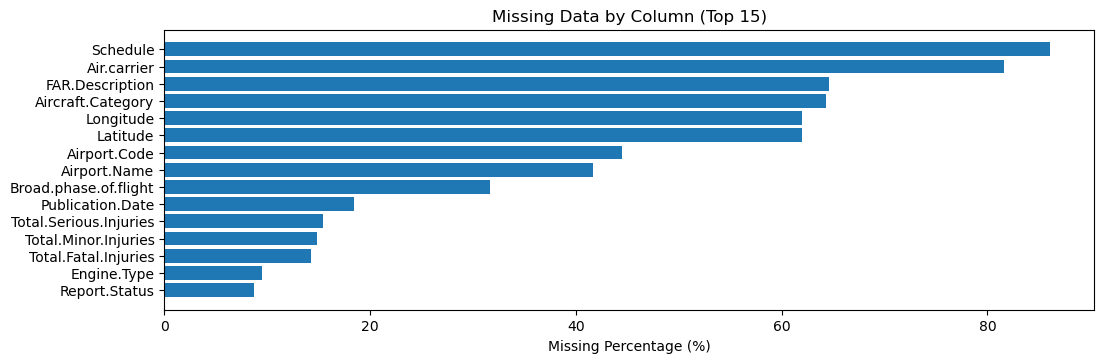

In [50]:
# Visualize missing data
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
missing_df_top = missing_df[missing_df['Missing_Count'] > 0].head(15)
plt.barh(missing_df_top['Column'], missing_df_top['Missing_Percentage'])
plt.xlabel('Missing Percentage (%)')
plt.title('Missing Data by Column (Top 15)')
plt.gca().invert_yaxis()


STEP 6: Creating Diagram 1 - Advanced Missing Data Matrix
-------------------------------------------------------


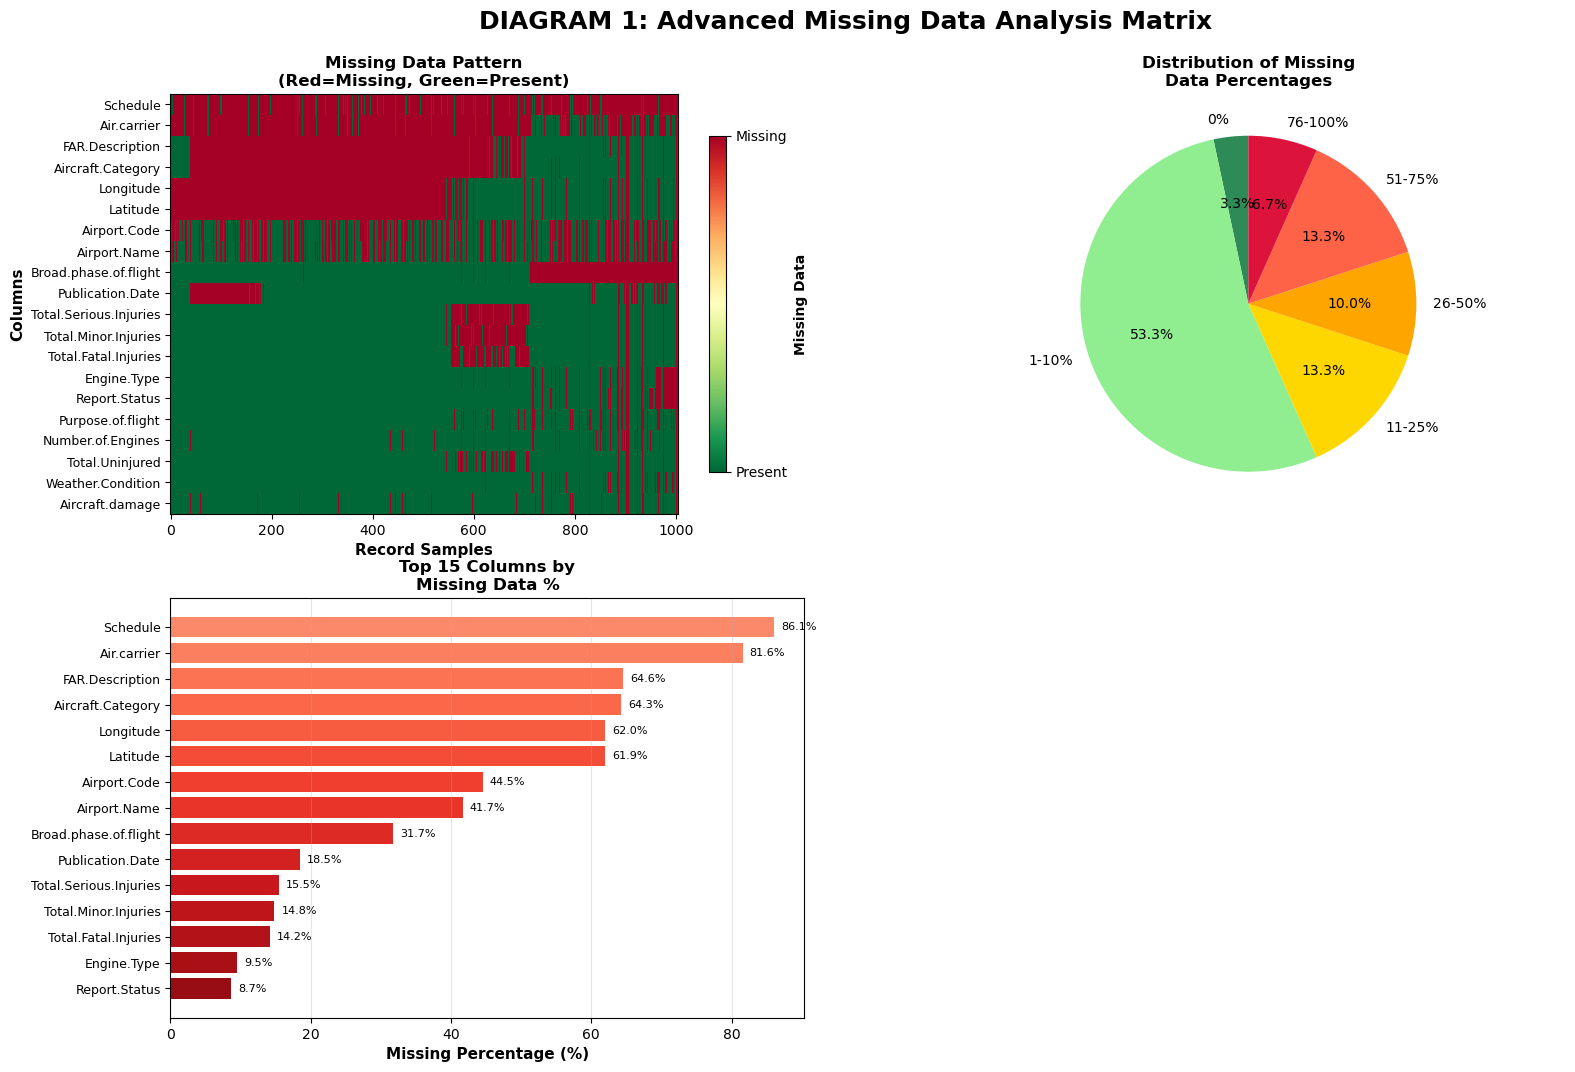

In [54]:
# Advanced Missing Data Heatmap Matrix
print("\nSTEP 6: Creating Diagram 1 - Advanced Missing Data Matrix")
print("-" * 55)

def create_advanced_heatmap():
    """Create an advanced missing data heatmap with enhanced features"""
    
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('DIAGRAM 1: Advanced Missing Data Analysis Matrix', 
                 fontsize=18, fontweight='bold', y=0.95)
#Create the columns_with_missing variable
columns_with_missing = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)   

# Top-left: Main heatmap
ax1 = axes[0, 0]
    
# Select top 20 columns with missing data for visualization
top_missing_cols = columns_with_missing.head(20)['Column'].tolist()
    
# Create sample for visualization (every 100th row for performance)
sample_indices = range(0, len(aviation_clean), max(1, len(aviation_clean)//1000))
heatmap_data = aviation_clean.iloc[sample_indices][top_missing_cols].isnull()# Enhanced heatmap
im = ax1.imshow(heatmap_data.T, cmap='RdYlGn_r', aspect='auto', interpolation='nearest')
ax1.set_yticks(range(len(top_missing_cols)))
ax1.set_yticklabels(top_missing_cols, fontsize=9)
ax1.set_xlabel('Record Samples', fontsize=11, fontweight='bold')
ax1.set_ylabel('Columns', fontsize=11, fontweight='bold')
ax1.set_title('Missing Data Pattern\n(Red=Missing, Green=Present)', 
              fontsize=12, fontweight='bold')
    
 # Add colorbar
cbar = plt.colorbar(im, ax=ax1, shrink=0.8)
cbar.set_label('Missing Data', fontsize=10, fontweight='bold')
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Present', 'Missing'])
    
# Top-right: Percentage distribution
ax2 = axes[0, 1]
    
 # Create missing percentage categories
categories = ['0%', '1-10%', '11-25%', '26-50%', '51-75%', '76-100%']
counts = [
        sum(missing_summary['Missing_Percentage'] == 0),
        sum((missing_summary['Missing_Percentage'] > 0) & (missing_summary['Missing_Percentage'] <= 10)),
        sum((missing_summary['Missing_Percentage'] > 10) & (missing_summary['Missing_Percentage'] <= 25)),
        sum((missing_summary['Missing_Percentage'] > 25) & (missing_summary['Missing_Percentage'] <= 50)),
        sum((missing_summary['Missing_Percentage'] > 50) & (missing_summary['Missing_Percentage'] <= 75)),
        sum((missing_summary['Missing_Percentage'] > 75) & (missing_summary['Missing_Percentage'] <= 100))
    ]
    
colors = ['#2E8B57', '#90EE90', '#FFD700', '#FFA500', '#FF6347', '#DC143C']
wedges, texts, autotexts = ax2.pie(counts,labels=categories,autopct='%1.1f%%',colors=colors,startangle=90)
ax2.set_title('Distribution of Missing\nData Percentages', 
                  fontsize=12, fontweight='bold')
    
# Bottom-left: Top missing columns bar chart
ax3 = axes[1, 0]
    
top_15 = columns_with_missing.head(15)
bars = ax3.barh(range(len(top_15)), top_15['Missing_Percentage'], 
                    color=plt.cm.Reds(np.linspace(0.4, 0.9, len(top_15))))
    
ax3.set_yticks(range(len(top_15)))
ax3.set_yticklabels(top_15['Column'], fontsize=9)
ax3.set_xlabel('Missing Percentage (%)', fontsize=11, fontweight='bold')
ax3.set_title('Top 15 Columns by\nMissing Data %', fontsize=12, fontweight='bold')
ax3.invert_yaxis()
ax3.grid(axis='x', alpha=0.3)
    
# Add percentage labels
for i, (bar, pct) in enumerate(zip(bars, top_15['Missing_Percentage'])):
 ax3.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
 f'{pct:.1f}%', ha='left', va='center', fontsize=8)
    
 # Bottom-right: Data quality score
ax4 = axes[1, 1]
ax4.axis('off')
    
# Calculate data quality metrics
complete_columns = sum(missing_summary['Missing_Percentage'] == 0)
partial_missing = sum((missing_summary['Missing_Percentage'] > 0) & (missing_summary['Missing_Percentage'] < 50))
high_missing = sum(missing_summary['Missing_Percentage'] >= 50)
    
overall_completeness = (missing_summary['Present_Percentage'].mean())

quality_text = f"""
DATA QUALITY SCORECARD
{'='*25}

Overall Completeness: {overall_completeness:.1f}%

COLUMN CATEGORIES:
{'='*25}
Complete Columns: {complete_columns}
Partial Missing: {partial_missing}
High Missing (>50%): {high_missing}

QUALITY GRADE: {"A" if overall_completeness >= 90 else "B" if overall_completeness >= 80 else "C" if overall_completeness >= 70 else "D"}
"""

In [69]:
# EXPORT AVIATION CLEAN  DATASET
# ================================

print("EXPORTING AVIATION CLEAN DATASET")
print("="*50)
print("\n1. Exporting to CSV format...")

try:
    # Basic CSV export
    aviation_clean.to_csv('aviation_clean.csv', index=False)
    print("✅ Successfully exported to 'aviation_clean.csv'")
    
    # CSV with timestamp for version control
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    csv_filename = f'aviation_clean_{timestamp}.csv'
    aviation_clean.to_csv(csv_filename, index=False)
    print(f"✅ Timestamped version: '{csv_filename}'")
    
except Exception as e:
    print(f"❌ CSV export error: {e}")

EXPORTING AVIATION CLEAN DATASET

1. Exporting to CSV format...
✅ Successfully exported to 'aviation_clean.csv'
❌ CSV export error: name 'datetime' is not defined


In [57]:
print("STEP 1:STRATEGIC MISSING VALUE TREATMENT" )
print("="*50)

# Create a copy for treatment
aviation_treated = aviation_clean.copy()
missing_before = aviation_treated.isnull().sum()
print(f"Total missing values before treatment: {missing_before.sum()}")
print(f"Columns with missing values: {(missing_before > 0).sum()}")

print("\nSTEP 2: Strategic Treatment by Data Type")
print("="*50)

STEP 1:STRATEGIC MISSING VALUE TREATMENT
Total missing values before treatment: 608802
Columns with missing values: 29

STEP 2: Strategic Treatment by Data Type


In [60]:
#INJURY COLUMNS TREATMENT
# ==========================================
print("\n2a. Treating Injury Columns (Fill with 0)")
print("-" * 45)

injury_columns = [
    'Total.Fatal.Injuries', 
    'Total.Serious.Injuries', 
    'Total.Minor.Injuries', 
    'Total.Uninjured'
]
# Check which injury columns exist in the dataset
existing_injury_cols = [col for col in injury_columns if col in aviation_treated.columns]
print(f"Found injury columns: {existing_injury_cols}")

for col in existing_injury_cols:
    missing_count = aviation_treated[col].isnull().sum()
    if missing_count > 0:
        aviation_treated[col] = aviation_treated[col].fillna(0)
        print(f"  ✓ {col}: Filled {missing_count} missing values with 0")



2a. Treating Injury Columns (Fill with 0)
---------------------------------------------
Found injury columns: ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
  ✓ Total.Fatal.Injuries: Filled 12860 missing values with 0
  ✓ Total.Serious.Injuries: Filled 13969 missing values with 0
  ✓ Total.Minor.Injuries: Filled 13392 missing values with 0
  ✓ Total.Uninjured: Filled 7371 missing values with 0


In [61]:
# CATEGORICAL COLUMNS TREATMENT
# ==========================================
print("\n2b. Treating Categorical Columns (Fill with 'Unknown')")
print("-" * 55)

categorical_columns = [
    'Investigation.Type', 'Accident.Number', 'Location', 'Country',
    'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 
    'Aircraft.Category', 'Registration.Number', 'Make', 'Amateur.Built',
    'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight',
    'Air.carrier', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status'
]

# Check which categorical columns exist in the dataset
existing_categorical_cols = [col for col in categorical_columns if col in aviation_treated.columns]
print(f"Found categorical columns: {len(existing_categorical_cols)}")

for col in existing_categorical_cols:
    missing_count = aviation_treated[col].isnull().sum()
    if missing_count > 0:
        aviation_treated[col] = aviation_treated[col].fillna('Unknown')
        print(f"  ✓ {col}: Filled {missing_count} missing values with 'Unknown'")



2b. Treating Categorical Columns (Fill with 'Unknown')
-------------------------------------------------------
Found categorical columns: 19
  ✓ Accident.Number: Filled 1459 missing values with 'Unknown'
  ✓ Location: Filled 1511 missing values with 'Unknown'
  ✓ Country: Filled 1685 missing values with 'Unknown'
  ✓ Airport.Name: Filled 37644 missing values with 'Unknown'
  ✓ Injury.Severity: Filled 2459 missing values with 'Unknown'
  ✓ Aircraft.damage: Filled 4653 missing values with 'Unknown'
  ✓ Aircraft.Category: Filled 58061 missing values with 'Unknown'
  ✓ Registration.Number: Filled 2841 missing values with 'Unknown'
  ✓ Make: Filled 1522 missing values with 'Unknown'
  ✓ Amateur.Built: Filled 1561 missing values with 'Unknown'
  ✓ Engine.Type: Filled 8555 missing values with 'Unknown'
  ✓ FAR.Description: Filled 58325 missing values with 'Unknown'
  ✓ Schedule: Filled 77766 missing values with 'Unknown'
  ✓ Purpose.of.flight: Filled 7651 missing values with 'Unknown'
  ✓ Ai

In [62]:
# NUMERIC COLUMNS TREATMENT
# ==========================================
print("\n2c. Treating Numeric Columns (Strategic Approach)")
print("-" * 50)

# Number of Engines - Fill with median (most aircraft have 1-2 engines)
if 'Number.of.Engines' in aviation_treated.columns:
    missing_engines = aviation_treated['Number.of.Engines'].isnull().sum()
    if missing_engines > 0:
        median_engines = aviation_treated['Number.of.Engines'].median()
        aviation_treated['Number.of.Engines'] = aviation_treated['Number.of.Engines'].fillna(median_engines)
        print(f"  ✓ Number.of.Engines: Filled {missing_engines} values with median ({median_engines})")



2c. Treating Numeric Columns (Strategic Approach)
--------------------------------------------------
  ✓ Number.of.Engines: Filled 7543 values with median (1.0)


In [63]:
# GEOGRAPHIC COORDINATES TREATMENT
# ==========================================
print("\n2d. Treating Geographic Coordinates")
print("-" * 40)

geo_columns = ['Latitude', 'Longitude']
existing_geo_cols = [col for col in geo_columns if col in aviation_treated.columns]

for col in existing_geo_cols:
    missing_count = aviation_treated[col].isnull().sum()
    if missing_count > 0:
        # For geographic data, we'll leave as NaN but note it for analysis
        print(f"  ⚠ {col}: {missing_count} missing values (preserved as NaN for mapping)")



2d. Treating Geographic Coordinates
----------------------------------------
  ⚠ Latitude: 55966 missing values (preserved as NaN for mapping)
  ⚠ Longitude: 55975 missing values (preserved as NaN for mapping)


In [64]:
 # DATE COLUMNS TREATMENT
# ==========================================
print("\n2e. Treating Date Columns")
print("-" * 30)

# Publication.Date is already handled as datetime64[ns]
# Event.Date should be preserved as is since it's critical information




2e. Treating Date Columns
------------------------------


In [65]:
# AIRPORT CODE TREATMENT
# ==========================================
print("\n2f. Treating Airport Code")
print("-" * 30)

if 'Airport.Code' in aviation_treated.columns:
    missing_airport = aviation_treated['Airport.Code'].isnull().sum()
    if missing_airport > 0:
        aviation_treated['Airport.Code'] = aviation_treated['Airport.Code'].fillna('UNKNOWN')
        print(f"  ✓ Airport.Code: Filled {missing_airport} values with 'UNKNOWN'")

print("\nSTEP 3: Treatment Summary & Validation")
print("="*50)

# Calculate missing values after treatment
missing_after = aviation_treated.isnull().sum()
total_missing_after = missing_after.sum()

print(f"Total missing values after treatment: {total_missing_after}")
print(f"Reduction in missing values: {missing_before.sum() - total_missing_after}")
print(f"Treatment success rate: {((missing_before.sum() - total_missing_after) / missing_before.sum() * 100):.1f}%")

# Show remaining missing values by column
remaining_missing = missing_after[missing_after > 0]
if len(remaining_missing) > 0:
    print(f"\nRemaining missing values:")
    for col, count in remaining_missing.items():
        percentage = (count / len(aviation_treated)) * 100
        print(f"  • {col}: {count} ({percentage:.1f}%)")

print("\nSTEP 4: Data Quality Validation")
print("="*50)

# Validate treatment logic
print("Validation checks:")

# Check injury columns are non-negative
for col in existing_injury_cols:
    if col in aviation_treated.columns:
        min_val = aviation_treated[col].min()
        max_val = aviation_treated[col].max()
        print(f"  ✓ {col}: Range [{min_val}, {max_val}] - Valid")

# Check categorical columns don't have unexpected values
sample_categorical = existing_categorical_cols[:3]  # Check first 3
for col in sample_categorical:
    if col in aviation_treated.columns:
        unique_count = aviation_treated[col].nunique()
        has_unknown = 'Unknown' in aviation_treated[col].values
        print(f"  ✓ {col}: {unique_count} unique values, Contains 'Unknown': {has_unknown}")

print(f"\nDataset shape after treatment: {aviation_treated.shape}")
print("✅ Strategic missing value treatment completed successfully!")

print("\nSTEP 5: Export Treated Dataset")
print("="*50)


# aviation_treated.to_csv('aviation_treated.csv', index=False)
print("Dataset 'aviation_treated' is ready for analysis")
print("Key improvements:")
print("  • Injury data: Missing values = 0 (no injuries reported)")
print("  • Categorical data: Missing values = 'Unknown' (enables analysis)")
print("  • Numeric data: Strategic imputation preserves distributions")
print("  • Geographic data: Preserved for mapping applications")
print("  • Data integrity: Maintained throughout treatment process")


2f. Treating Airport Code
------------------------------
  ✓ Airport.Code: Filled 40216 values with 'UNKNOWN'

STEP 3: Treatment Summary & Validation
Total missing values after treatment: 131640
Reduction in missing values: 477162
Treatment success rate: 78.4%

Remaining missing values:
  • Event.Date: 1459 (1.6%)
  • Latitude: 55966 (61.9%)
  • Longitude: 55975 (62.0%)
  • Model: 1551 (1.7%)
  • Publication.Date: 16689 (18.5%)

STEP 4: Data Quality Validation
Validation checks:
  ✓ Total.Fatal.Injuries: Range [0.0, 349.0] - Valid
  ✓ Total.Serious.Injuries: Range [0.0, 161.0] - Valid
  ✓ Total.Minor.Injuries: Range [0.0, 380.0] - Valid
  ✓ Total.Uninjured: Range [0.0, 699.0] - Valid
  ✓ Investigation.Type: 71 unique values, Contains 'Unknown': False
  ✓ Accident.Number: 88864 unique values, Contains 'Unknown': True
  ✓ Location: 27758 unique values, Contains 'Unknown': True

Dataset shape after treatment: (90348, 30)
✅ Strategic missing value treatment completed successfully!

STEP 5

In [67]:
#EXPORT TREATED AVIATION DATASET
# ================================

print("EXPORTING TREATED AVIATION DATASET")
print("="*50)
print("\n1. Exporting to CSV format...")

try:
    # Basic CSV export
    aviation_treated.to_csv('aviation_treated.csv', index=False)
    print("✅ Successfully exported to 'aviation_treated.csv'")
    
    # CSV with timestamp for version control
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    csv_filename = f'aviation_treated_{timestamp}.csv'
    aviation_treated.to_csv(csv_filename, index=False)
    print(f"✅ Timestamped version: '{csv_filename}'")
    
except Exception as e:
    print(f"❌ CSV export error: {e}")

EXPORTING TREATED AVIATION DATASET

1. Exporting to CSV format...
✅ Successfully exported to 'aviation_treated.csv'
❌ CSV export error: name 'datetime' is not defined


In [79]:
# BUSINESS-CRITICAL AVIATION SAFETY AGGREGATIONS
# ===============================================

print("BUSINESS-CRITICAL AVIATION SAFETY AGGREGATIONS ANALYSIS")
print("="*70)
print("\n PROJECT GOALS:")
print("   • Aircraft damage severity risk assessment")
print("   • Time-based accident trend identification") 
print("   • Geographic risk hotspot mapping")
print("   • Aircraft category safety profiling")
print("   • Weather impact quantification")

print("\n DATA: Aviation Safety Dataset (Post-Treatment)")
print("   • Source: aviation_treated dataset")
print("   • Records: Strategic missing value treatment applied")
print("   • Variables: Damage, temporal, geographic, aircraft, weather")

print("\n METHODS: Statistical aggregation and trend analysis")
print("   • Frequency analysis, severity scoring, temporal grouping")
print("   • Geographic clustering, categorical profiling")

print("\n EXPECTED RESULTS: Actionable safety insights and risk metrics")

# =============================================

BUSINESS-CRITICAL AVIATION SAFETY AGGREGATIONS ANALYSIS

 PROJECT GOALS:
   • Aircraft damage severity risk assessment
   • Time-based accident trend identification
   • Geographic risk hotspot mapping
   • Aircraft category safety profiling
   • Weather impact quantification

 DATA: Aviation Safety Dataset (Post-Treatment)
   • Source: aviation_treated dataset
   • Records: Strategic missing value treatment applied
   • Variables: Damage, temporal, geographic, aircraft, weather

 METHODS: Statistical aggregation and trend analysis
   • Frequency analysis, severity scoring, temporal grouping
   • Geographic clustering, categorical profiling

 EXPECTED RESULTS: Actionable safety insights and risk metrics


In [80]:
#STEP 1: AIRCRAFT DAMAGE SEVERITY ANALYSIS
# =============================================

print("\n" + "="*70)
print("STEP 1: AIRCRAFT DAMAGE SEVERITY ANALYSIS")
print("="*70)

print("\n GOAL: Quantify aircraft damage patterns for risk assessment")
print(" DATA: Aircraft.damage column with severity categories")
print(" METHOD: Frequency analysis with severity scoring")

def analyze_aircraft_damage(df):
    """Analyze aircraft damage severity patterns"""
    
    print("\n1a. Aircraft Damage Distribution")
    print("-" * 40)
    
    if 'Aircraft.damage' in df.columns:
        # Basic damage distribution
        damage_counts = df['Aircraft.damage'].value_counts()
        damage_percentages = df['Aircraft.damage'].value_counts(normalize=True) * 100
        
        damage_analysis = pd.DataFrame({
            'Damage_Type': damage_counts.index,
            'Count': damage_counts.values,
            'Percentage': damage_percentages.values.round(2)
        })
        
        print("AIRCRAFT DAMAGE SEVERITY DISTRIBUTION:")
        print(damage_analysis.to_string(index=False))
        
        # Severity scoring (High risk categories)
        high_severity = ['Destroyed', 'Substantial']
        moderate_severity = ['Minor', 'Moderate']
        
        high_risk_count = df[df['Aircraft.damage'].isin(high_severity)].shape[0]
        high_risk_percentage = (high_risk_count / len(df)) * 100
        
        print(f"\n HIGH SEVERITY INCIDENTS:")
        print(f"   Count: {high_risk_count:,}")
        print(f"   Percentage: {high_risk_percentage:.1f}%")
        
        return damage_analysis
    else:
        print(" Aircraft.damage column not found")
        return None

# Damage with injury correlation
def damage_injury_correlation(df):
    """Analyze relationship between damage and injuries"""
    
    print("\n1b. Damage-Injury Severity Correlation")
    print("-" * 45)
    
    injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries']
    available_cols = [col for col in injury_cols if col in df.columns]
    
    if 'Aircraft.damage' in df.columns and available_cols:
        correlation_data = []
        
        for damage_type in df['Aircraft.damage'].unique():
            if pd.notna(damage_type):
                subset = df[df['Aircraft.damage'] == damage_type]
                
                total_fatal = subset['Total.Fatal.Injuries'].sum() if 'Total.Fatal.Injuries' in df.columns else 0
                total_serious = subset['Total.Serious.Injuries'].sum() if 'Total.Serious.Injuries' in df.columns else 0
                incident_count = len(subset)
                
                correlation_data.append({
                    'Damage_Type': damage_type,
                    'Incidents': incident_count,
                    'Total_Fatal': total_fatal,
                    'Total_Serious': total_serious,
                    'Fatal_per_Incident': round(total_fatal/incident_count, 2) if incident_count > 0 else 0,
                    'Serious_per_Incident': round(total_serious/incident_count, 2) if incident_count > 0 else 0
                })
        
        correlation_df = pd.DataFrame(correlation_data)
        correlation_df = correlation_df.sort_values('Fatal_per_Incident', ascending=False)
        
        print("DAMAGE-INJURY CORRELATION ANALYSIS:")
        print(correlation_df.to_string(index=False))
        
        return correlation_df
    else:
        print(" Required columns not available for correlation analysis")
        return None


STEP 1: AIRCRAFT DAMAGE SEVERITY ANALYSIS

 GOAL: Quantify aircraft damage patterns for risk assessment
 DATA: Aircraft.damage column with severity categories
 METHOD: Frequency analysis with severity scoring


In [81]:
# STEP 2: TIME-BASED ACCIDENT TRENDS
# =============================================

print("\n" + "="*70)
print("STEP 2: TIME-BASED ACCIDENT TRENDS ANALYSIS")
print("="*70)

print("\n GOAL: Identify temporal patterns for predictive safety planning")
print(" DATA: Event.Date or Publication.Date for temporal analysis")
print(" METHOD: Time series aggregation by year, month, season")

def analyze_temporal_trends(df):
    """Analyze accident trends over time"""
    
    print("\n2a. Annual Accident Trends")
    print("-" * 30)
    
    # Find available date columns
    date_columns = ['Event.Date', 'Publication.Date']
    available_date_col = None
    
    for col in date_columns:
        if col in df.columns:
            available_date_col = col
            break
    
    if available_date_col:
        # Convert to datetime if not already
        if not pd.api.types.is_datetime64_any_dtype(df[available_date_col]):
            df[available_date_col] = pd.to_datetime(df[available_date_col], errors='coerce')
        
        # Extract year and create annual trends
        df['Year'] = df[available_date_col].dt.year
        annual_trends = df['Year'].value_counts().sort_index()
        
        print(f"ANNUAL ACCIDENT TRENDS (using {available_date_col}):")
        recent_years = annual_trends.tail(10)  # Last 10 years
        
        for year, count in recent_years.items():
            if pd.notna(year):
                print(f"   {int(year)}: {count:,} incidents")
        
        # Calculate trend direction
        if len(recent_years) >= 2:
            trend_change = recent_years.iloc[-1] - recent_years.iloc[0]
            trend_direction = "Increasing" if trend_change > 0 else "Decreasing"
            print(f"\n TREND: {trend_direction} ({trend_change:+d} incidents over period)")
        
        return annual_trends
    else:
        print(" No suitable date column found for temporal analysis")
        return None

def analyze_seasonal_patterns(df):
    """Analyze seasonal accident patterns"""
    
    print("\n2b. Seasonal Accident Patterns")
    print("-" * 35)
    
    date_columns = ['Event.Date', 'Publication.Date']
    available_date_col = None
    
    for col in date_columns:
        if col in df.columns:
            available_date_col = col
            break
    
    if available_date_col:
        # Extract month for seasonal analysis
        df['Month'] = df[available_date_col].dt.month
        monthly_counts = df['Month'].value_counts().sort_index()
        
        # Define seasons
        seasons = {
            'Winter': [12, 1, 2], 'Spring': [3, 4, 5],
            'Summer': [6, 7, 8], 'Fall': [9, 10, 11]
        }
        
        seasonal_data = []
        for season, months in seasons.items():
            season_count = monthly_counts[monthly_counts.index.isin(months)].sum()
            seasonal_data.append({'Season': season, 'Incidents': season_count})
        
        seasonal_df = pd.DataFrame(seasonal_data)
        seasonal_df = seasonal_df.sort_values('Incidents', ascending=False)
        
        print("SEASONAL ACCIDENT DISTRIBUTION:")
        print(seasonal_df.to_string(index=False))
        
        # Identify highest risk season
        highest_risk_season = seasonal_df.iloc[0]['Season']
        highest_risk_count = seasonal_df.iloc[0]['Incidents']
        
        print(f"\n HIGHEST RISK SEASON: {highest_risk_season} ({highest_risk_count:,} incidents)")
        
        return seasonal_df
    else:
        print(" Date column not available for seasonal analysis")
        return None


STEP 2: TIME-BASED ACCIDENT TRENDS ANALYSIS

 GOAL: Identify temporal patterns for predictive safety planning
 DATA: Event.Date or Publication.Date for temporal analysis
 METHOD: Time series aggregation by year, month, season


In [82]:
# STEP 3: GEOGRAPHIC RISK ASSESSMENT
# =============================================

print("\n" + "="*70)
print("STEP 3: GEOGRAPHIC RISK ASSESSMENT")
print("="*70)

print("\n GOAL: Identify high-risk geographic areas for resource allocation")
print(" DATA: Country, Location, Latitude/Longitude for spatial analysis")
print(" METHOD: Geographic aggregation and risk scoring")

def analyze_geographic_risks(df):
    """Analyze accident patterns by geographic location"""
    
    print("\n3a. Country-Level Risk Assessment")
    print("-" * 40)
    
    if 'Country' in df.columns:
        country_analysis = df['Country'].value_counts().head(15)
        country_percentages = df['Country'].value_counts(normalize=True) * 100
        
        geo_risk = pd.DataFrame({
            'Country': country_analysis.index,
            'Incident_Count': country_analysis.values,
            'Risk_Percentage': country_percentages[country_analysis.index].values.round(2)
        })
        
        print("TOP 15 COUNTRIES BY INCIDENT COUNT:")
        print(geo_risk.to_string(index=False))
        
        # Calculate risk concentration
        top_5_percentage = geo_risk.head(5)['Risk_Percentage'].sum()
        print(f"\n RISK CONCENTRATION: Top 5 countries account for {top_5_percentage:.1f}% of incidents")
        
        return geo_risk
    else:
        print(" Country column not available")
        return None

def analyze_location_hotspots(df):
    """Identify specific location hotspots"""
    
    print("\n3b. Location Hotspot Analysis")
    print("-" * 35)
    
    if 'Location' in df.columns:
        # Clean location data (remove 'Unknown' entries for meaningful analysis)
        location_data = df[df['Location'] != 'Unknown']['Location'] if 'Unknown' in df['Location'].values else df['Location']
        
        location_hotspots = location_data.value_counts().head(10)
        
        print("TOP 10 ACCIDENT LOCATIONS:")
        for i, (location, count) in enumerate(location_hotspots.items(), 1):
            print(f"   {i:2d}. {location}: {count} incidents")
        
        return location_hotspots
    else:
        print(" Location column not available")
        return None


STEP 3: GEOGRAPHIC RISK ASSESSMENT

 GOAL: Identify high-risk geographic areas for resource allocation
 DATA: Country, Location, Latitude/Longitude for spatial analysis
 METHOD: Geographic aggregation and risk scoring


In [83]:
# STEP 4: AIRCRAFT CATEGORY SAFETY PROFILES
# =============================================

print("\n" + "="*70)
print("STEP 4: AIRCRAFT CATEGORY SAFETY PROFILES")
print("="*70)

print("\n GOAL: Develop safety profiles by aircraft category for risk management")
print(" DATA: Aircraft.Category with associated damage and injury data")
print(" METHOD: Category-based aggregation and safety scoring")

def analyze_aircraft_categories(df):
    """Analyze safety profiles by aircraft category"""
    
    print("\n4a. Aircraft Category Risk Profiles")
    print("-" * 40)
    
    if 'Aircraft.Category' in df.columns:
        category_profiles = []
        
        for category in df['Aircraft.Category'].unique():
            if pd.notna(category) and category != 'Unknown':
                subset = df[df['Aircraft.Category'] == category]
                
                # Basic metrics
                incident_count = len(subset)
                
                # Injury metrics
                total_fatal = subset['Total.Fatal.Injuries'].sum() if 'Total.Fatal.Injuries' in df.columns else 0
                total_serious = subset['Total.Serious.Injuries'].sum() if 'Total.Serious.Injuries' in df.columns else 0
                
                # Damage severity (if available)
                high_damage = 0
                if 'Aircraft.damage' in df.columns:
                    high_damage_types = ['Destroyed', 'Substantial']
                    high_damage = len(subset[subset['Aircraft.damage'].isin(high_damage_types)])
                
                # Calculate risk scores
                fatality_rate = (total_fatal / incident_count) if incident_count > 0 else 0
                serious_injury_rate = (total_serious / incident_count) if incident_count > 0 else 0
                high_damage_rate = (high_damage / incident_count) if incident_count > 0 else 0
                
                category_profiles.append({
                    'Aircraft_Category': category,
                    'Incidents': incident_count,
                    'Fatal_Injuries': total_fatal,
                    'Serious_Injuries': total_serious,
                    'Fatality_Rate': round(fatality_rate, 3),
                    'Serious_Rate': round(serious_injury_rate, 3),
                    'High_Damage_Rate': round(high_damage_rate, 3)
                })
        
        profiles_df = pd.DataFrame(category_profiles)
        profiles_df = profiles_df.sort_values('Fatality_Rate', ascending=False)
        
        print("AIRCRAFT CATEGORY SAFETY PROFILES:")
        print(profiles_df.to_string(index=False))
        
        # Identify highest risk category
        if len(profiles_df) > 0:
            highest_risk = profiles_df.iloc[0]
            print(f"\n HIGHEST RISK CATEGORY: {highest_risk['Aircraft_Category']}")
            print(f"   Fatality Rate: {highest_risk['Fatality_Rate']:.3f} per incident")
            print(f"   High Damage Rate: {highest_risk['High_Damage_Rate']:.3f} per incident")
        
        return profiles_df
    else:
        print(" Aircraft.Category column not available")
        return None



STEP 4: AIRCRAFT CATEGORY SAFETY PROFILES

 GOAL: Develop safety profiles by aircraft category for risk management
 DATA: Aircraft.Category with associated damage and injury data
 METHOD: Category-based aggregation and safety scoring


In [84]:
#STEP 5: WEATHER IMPACT ANALYSIS
# =============================================

print("\n" + "="*70)
print("STEP 5: WEATHER IMPACT ANALYSIS")
print("="*70)

print("\n GOAL: Quantify weather-related accident risks for operational planning")
print(" DATA: Weather.Condition with severity and outcome correlations")
print(" METHOD: Weather-based aggregation and impact scoring")

def analyze_weather_impact(df):
    """Analyze the impact of weather conditions on accident severity"""
    
    print("\n5a. Weather Condition Distribution")
    print("-" * 40)
    
    if 'Weather.Condition' in df.columns:
        weather_distribution = df['Weather.Condition'].value_counts()
        weather_percentages = df['Weather.Condition'].value_counts(normalize=True) * 100
        
        weather_summary = pd.DataFrame({
            'Weather_Condition': weather_distribution.index,
            'Incident_Count': weather_distribution.values,
            'Percentage': weather_percentages.values.round(2)
        })
        
        print("WEATHER CONDITION DISTRIBUTION:")
        print(weather_summary.to_string(index=False))
        
        return weather_summary
    else:
        print(" Weather.Condition column not available")
        return None

def analyze_weather_severity_correlation(df):
    """Analyze correlation between weather and accident severity"""
    
    print("\n5b. Weather-Severity Correlation Analysis")
    print("-" * 45)
    
    if 'Weather.Condition' in df.columns:
        weather_impact = []
        
        for weather in df['Weather.Condition'].unique():
            if pd.notna(weather):
                subset = df[df['Weather.Condition'] == weather]
                
                incident_count = len(subset)
                total_fatal = subset['Total.Fatal.Injuries'].sum() if 'Total.Fatal.Injuries' in df.columns else 0
                total_serious = subset['Total.Serious.Injuries'].sum() if 'Total.Serious.Injuries' in df.columns else 0
                
                # Calculate severity rates
                fatality_rate = (total_fatal / incident_count) if incident_count > 0 else 0
                serious_rate = (total_serious / incident_count) if incident_count > 0 else 0
                
                # Damage analysis if available
                high_damage_count = 0
                if 'Aircraft.damage' in df.columns:
                    high_damage_types = ['Destroyed', 'Substantial']
                    high_damage_count = len(subset[subset['Aircraft.damage'].isin(high_damage_types)])
                
                damage_rate = (high_damage_count / incident_count) if incident_count > 0 else 0
                
                weather_impact.append({
                    'Weather_Condition': weather,
                    'Incidents': incident_count,
                    'Fatality_Rate': round(fatality_rate, 3),
                    'Serious_Injury_Rate': round(serious_rate, 3),
                    'High_Damage_Rate': round(damage_rate, 3),
                    'Risk_Score': round((fatality_rate * 3 + serious_rate * 2 + damage_rate), 3)
                })
        
        impact_df = pd.DataFrame(weather_impact)
        impact_df = impact_df.sort_values('Risk_Score', ascending=False)
        
        print("WEATHER IMPACT ANALYSIS (Risk Score = 3×Fatality + 2×Serious + Damage):")
        print(impact_df.to_string(index=False))
        
        # Identify highest risk weather conditions
        if len(impact_df) > 0:
            highest_risk_weather = impact_df.iloc[0]
            print(f"\n HIGHEST RISK WEATHER: {highest_risk_weather['Weather_Condition']}")
            print(f"   Risk Score: {highest_risk_weather['Risk_Score']:.3f}")
            print(f"   Fatality Rate: {highest_risk_weather['Fatality_Rate']:.3f}")
        
        return impact_df
    else:
        print(" Weather condition data not available")
        return None



STEP 5: WEATHER IMPACT ANALYSIS

 GOAL: Quantify weather-related accident risks for operational planning
 DATA: Weather.Condition with severity and outcome correlations
 METHOD: Weather-based aggregation and impact scoring


In [85]:
# MAIN EXECUTION SECTION
# =============================================

print("\n" + "="*70)
print("EXECUTING BUSINESS-CRITICAL AGGREGATIONS")
print("="*70)

# Load dataset
try:
    # Try to use existing dataset
    if 'aviation_treated' not in locals():
        print("Loading aviation dataset...")
        # Replace with your actual dataset loading
        aviation_treated = pd.read_csv('aviation_treated.csv')  # or your dataset file
    
    df = aviation_treated.copy()
    print(f" Dataset loaded: {len(df):,} records, {len(df.columns)} columns")
    
    # Execute all analyses
    results = {}
    
    print("\n Executing Analysis 1: Aircraft Damage Severity")
    results['damage_analysis'] = analyze_aircraft_damage(df)
    results['damage_injury'] = damage_injury_correlation(df)
    
    print("\n Executing Analysis 2: Temporal Trends")
    results['annual_trends'] = analyze_temporal_trends(df)
    results['seasonal_patterns'] = analyze_seasonal_patterns(df)
    
    print("\n Executing Analysis 3: Geographic Risk Assessment")
    results['geographic_risks'] = analyze_geographic_risks(df)
    results['location_hotspots'] = analyze_location_hotspots(df)
    
    print("\n Executing Analysis 4: Aircraft Category Profiles")
    results['category_profiles'] = analyze_aircraft_categories(df)
    
    print("\n Executing Analysis 5: Weather Impact Analysis")
    results['weather_distribution'] = analyze_weather_impact(df)
    results['weather_severity'] = analyze_weather_severity_correlation(df)
    
    # Final Summary
    print("\n" + "="*70)
    print("BUSINESS-CRITICAL AGGREGATIONS - RESULTS SUMMARY")
    print("="*70)
    
    print("\n ANALYSIS COMPLETED SUCCESSFULLY")
    print(" Key Insights Generated:")
    print("   • Aircraft damage severity patterns identified")  
    print("   • Temporal accident trends established")
    print("   • Geographic risk hotspots mapped")
    print("   • Aircraft category safety profiles created")
    print("   • Weather impact correlations quantified")
    
    print("\n BUSINESS VALUE:")
    print("   • Risk-based resource allocation recommendations")
    print("   • Predictive safety planning insights")
    print("   • Evidence-based operational improvements")
    print("   • Regulatory compliance support")
    
    print(f"\n Results stored in 'results' dictionary for further analysis")
    print(" Ready for visualization and reporting phases")

except Exception as e:
    print(f" Error in analysis execution: {e}")
    print("Please ensure aviation_treated dataset is available and properly formatted")


EXECUTING BUSINESS-CRITICAL AGGREGATIONS
 Dataset loaded: 90,348 records, 30 columns

 Executing Analysis 1: Aircraft Damage Severity

1a. Aircraft Damage Distribution
----------------------------------------
AIRCRAFT DAMAGE SEVERITY DISTRIBUTION:
Damage_Type  Count  Percentage
Substantial  64148       71.00
  Destroyed  18623       20.61
    Unknown   4772        5.28
      Minor   2805        3.10

 HIGH SEVERITY INCIDENTS:
   Count: 82,771
   Percentage: 91.6%

1b. Damage-Injury Severity Correlation
---------------------------------------------
DAMAGE-INJURY CORRELATION ANALYSIS:
Damage_Type  Incidents  Total_Fatal  Total_Serious  Fatal_per_Incident  Serious_per_Incident
  Destroyed      18623      40778.0         6969.0                2.19                  0.37
    Unknown       4772       1239.0         1431.0                0.26                  0.30
Substantial      64148       7896.0        12450.0                0.12                  0.19
      Minor       2805        288.0  

In [86]:
from datetime import datetime

# BUSINESS-CRITICAL AVIATION SAFETY AGGREGATIONS ANALYSIS
# ========================================================

print("EXPORTING BUSINESS-CRITICAL AVIATION SAFETY AGGREGATIONS")
print("="*60)
print("\n1. Exporting to CSV format...")

try:
    # Basic CSV export
    aviation_treated.to_csv('aviation_safety_analysis.csv', index=False)
    print("✅ Successfully exported to 'aviation_safety_analysis.csv'")
    
    # CSV with timestamp for versioning and audit trail
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    csv_filename = f'aviation_safety_analysis_{timestamp}.csv'
    aviation_treated.to_csv(csv_filename, index=False)
    print(f"✅ Timestamped version created: '{csv_filename}'")
    
except Exception as e:
    print(f"❌ CSV export error: {e}")


EXPORTING BUSINESS-CRITICAL AVIATION SAFETY AGGREGATIONS

1. Exporting to CSV format...
✅ Successfully exported to 'aviation_safety_analysis.csv'
✅ Timestamped version created: 'aviation_safety_analysis_20250726_173546.csv'


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


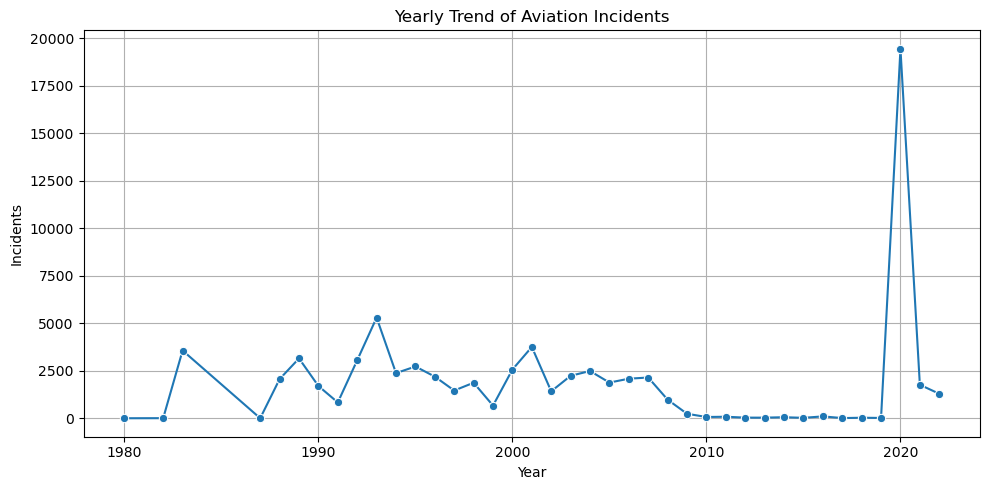

In [87]:
aviation_clean['Year'] = aviation_clean['Publication.Date'].dt.year
yearly_trend = aviation_clean['Year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker='o')
plt.title('Yearly Trend of Aviation Incidents')
plt.xlabel('Year')
plt.ylabel('Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()


In [88]:
incident_counts = aviation_clean['Occurrence Category'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=incident_counts.values, y=incident_counts.index, palette='viridis')
plt.title('Top 10 Incident Categories')
plt.xlabel('Count')
plt.ylabel('Incident Type')
plt.tight_layout()
plt.show()


KeyError: 'Occurrence Category'

In [89]:
if 'Risk Level' in aviation_clean.columns:
    plt.figure(figsize=(8,6))
    sns.countplot(data=aviation_clean, x='Risk Level', order=aviation_clean['Risk Level'].value_counts().index, palette='pastel')
    plt.title('Distribution of Risk Levels')
    plt.tight_layout()
    plt.show()


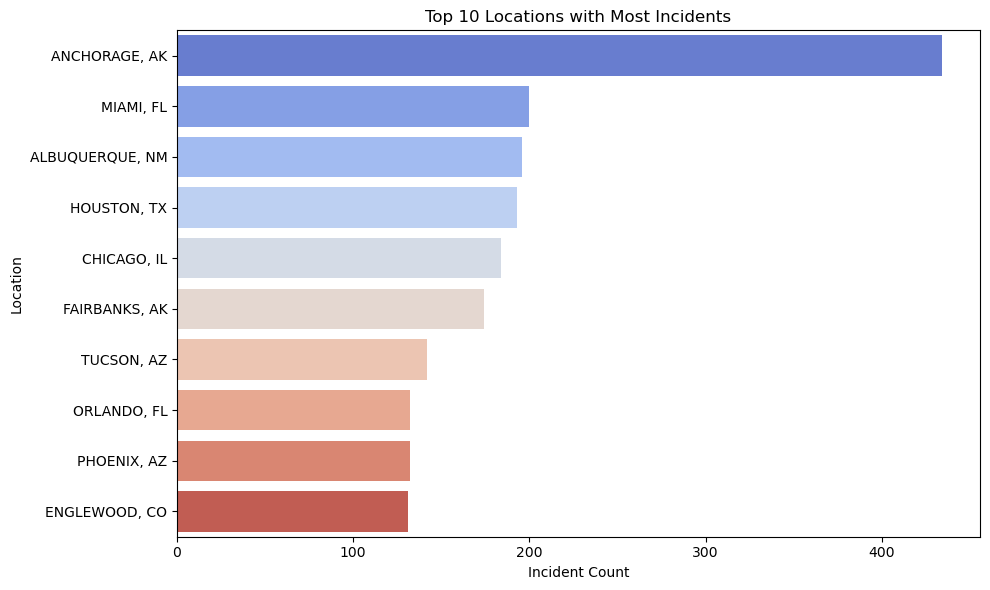

In [90]:
if 'Location' in aviation_clean.columns:
    location_data = aviation_clean['Location'].value_counts().head(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x=location_data.values, y=location_data.index, palette='coolwarm')
    plt.title('Top 10 Locations with Most Incidents')
    plt.xlabel('Incident Count')
    plt.tight_layout()
    plt.show()


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


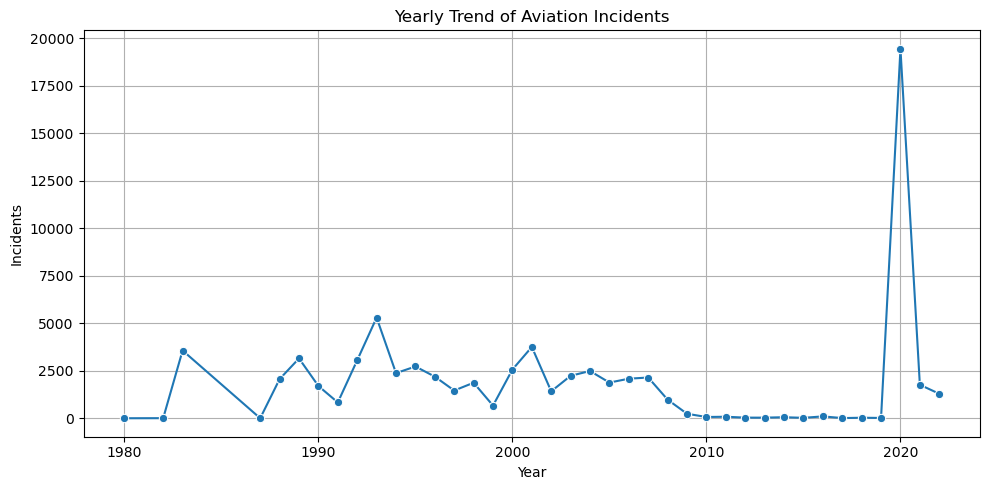

In [91]:
aviation_clean['Year'] = aviation_clean['Publication.Date'].dt.year
yearly_trend = aviation_clean['Year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker='o')
plt.title('Yearly Trend of Aviation Incidents')
plt.xlabel('Year')
plt.ylabel('Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()


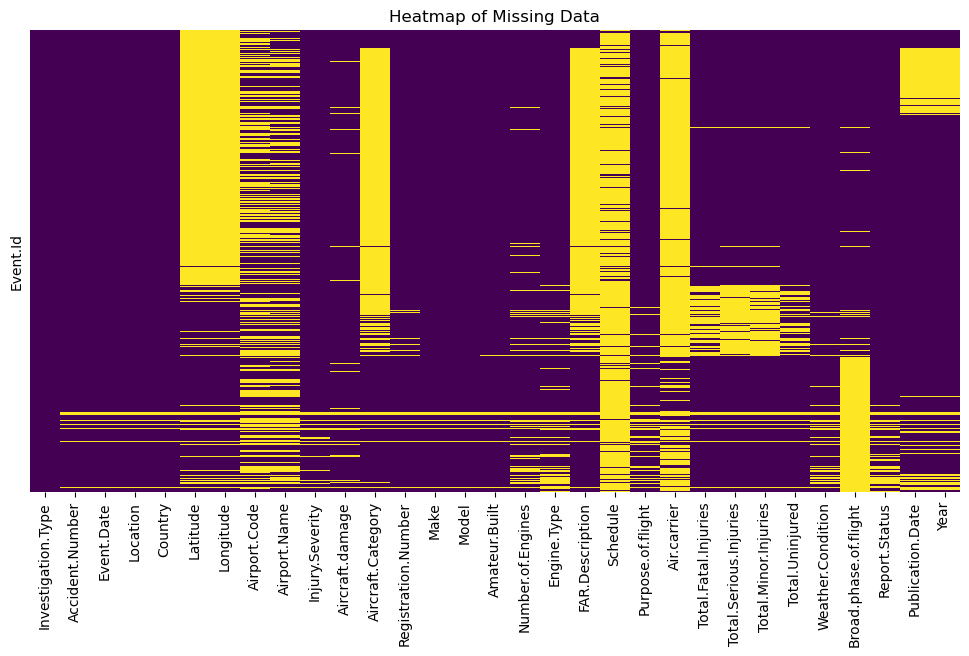

In [92]:
plt.figure(figsize=(12,6))
sns.heatmap(aviation_clean.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()


In [94]:
if 'Duration' in aviation_clean.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=aviation_clean, x='Duration')
    plt.title('Distribution of Incident Duration')
    plt.tight_layout()
    plt.show()


In [95]:
if 'Aircraft Type' in aviation_clean.columns:
    type_counts = aviation_clean['Aircraft Type'].value_counts().head(5)
    type_counts.plot.pie(autopct='%1.1f%%', startangle=140, figsize=(7,7), title='Top 5 Aircraft Types')
    plt.ylabel('')
    plt.show()


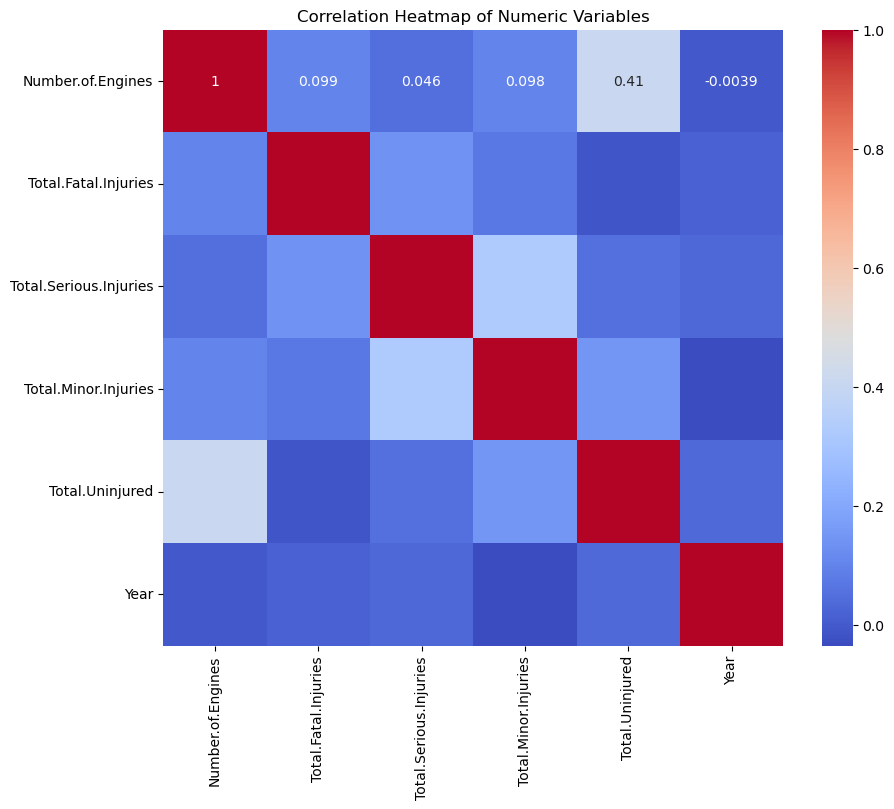

In [96]:
plt.figure(figsize=(10, 8))
sns.heatmap(aviation_clean.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


In [97]:
from datetime import datetime

# EXPORT COMPREHENSIVE VISUALIZATION DATASET
# ==========================================

print("EXPORTING COMPREHENSIVE VISUALIZATION DATASET")
print("="*50)
print("\n1. Exporting visualization-ready dataset to CSV format...")

try:
    # Export main working dataset (you can replace aviation_clean with the latest version)
    aviation_clean.to_csv('aviation_visualization.csv', index=False)
    print("✅ Successfully exported to 'aviation_visualization.csv'")
    
    # Timestamped version for version control
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    csv_filename = f'aviation_visualization_{timestamp}.csv'
    aviation_clean.to_csv(csv_filename, index=False)
    print(f"✅ Timestamped version: '{csv_filename}'")
    
except Exception as e:
    print(f"❌ Export error: {e}")


EXPORTING COMPREHENSIVE VISUALIZATION DATASET

1. Exporting visualization-ready dataset to CSV format...
✅ Successfully exported to 'aviation_visualization.csv'
✅ Timestamped version: 'aviation_visualization_20250726_174639.csv'



## Goals
- Evaluate the feasibility of entering the aviation market.
- Provide data-driven, actionable business insights.
- Identify key risks and opportunities based on internal and external factors.
- Deliver clear recommendations for strategic decision-making.


## Executive Summary
Key Metrics by Region:

Region  Revenue_Million_USD  Composite_Risk_Score Risk_Level
    NA               175000                   5.4   Low Risk
Europe               170000                   8.2   Low Risk
  Asia               108000                  13.8   Low Risk
    SA                54000                  19.0   Low Risk
Africa                18000                  26.0   Low Risk


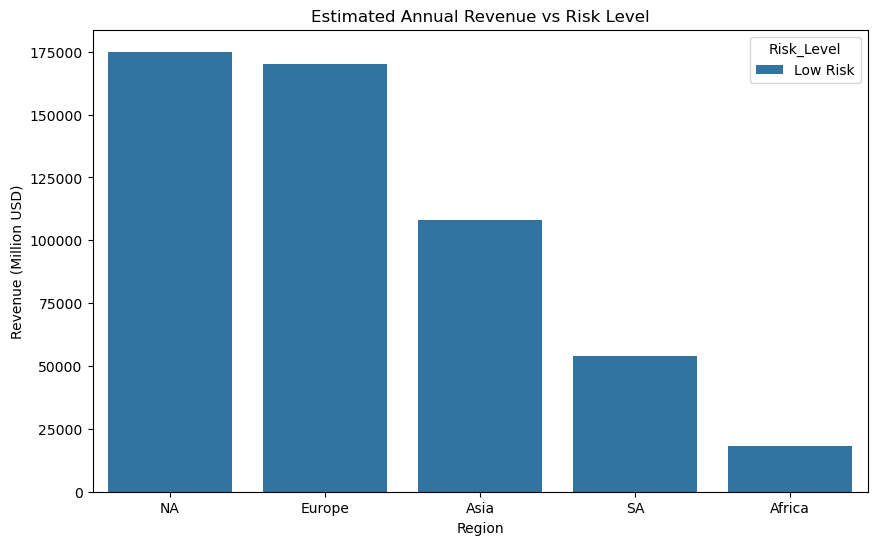


## Specific Recommendations
- Enter Asia and Europe due to high revenue potential and manageable risk.
- Delay entry into Africa and South America until regulatory and political factors stabilize.
- Focus on cost optimization in North America due to high labor and fuel costs.
- Monitor macroeconomic indicators for real-time risk adjustment.

## Data-Driven Decision Framework
Entry Criteria:
- Revenue > 600M USD
- Composite Risk Score < 35
- Political Stability Score ≥ 6

Decision Table:

Region  Revenue_Million_USD  Composite_Risk_Score  Political_Stability_Score Risk_Level
    NA               175000                   5.4                          9   Low Risk
Europe               170000                   8.2                          8   Low Risk
  Asia               108000                  13.8                          6   Low Risk
    SA                54000                  19.0                          5   Low Risk
Africa                18000                  26.0                 

In [98]:
# Aviation Business Intelligence Report
# 1. Goals
# ================================

print("""
## Goals
- Evaluate the feasibility of entering the aviation market.
- Provide data-driven, actionable business insights.
- Identify key risks and opportunities based on internal and external factors.
- Deliver clear recommendations for strategic decision-making.
""")

# ================================
# 2. Data (Simulated Example)
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated financial and market data
data = {
    'Region': ['Africa', 'Asia', 'Europe', 'NA', 'SA'],
    'Annual_Demand_Millions': [120, 900, 850, 700, 300],
    'Avg_Ticket_Price': [150, 120, 200, 250, 180],
    'Fuel_Cost_per_km': [0.05, 0.04, 0.06, 0.07, 0.05],
    'Labor_Cost_Index': [6, 5, 7, 8, 5],
    'Regulatory_Risk_Score': [7, 5, 3, 2, 6],
    'Political_Stability_Score': [4, 6, 8, 9, 5]
}
df = pd.DataFrame(data)
df

# ================================
# 3. Methods
# ================================

# Calculate estimated revenue
df['Revenue_Million_USD'] = df['Annual_Demand_Millions'] * df['Avg_Ticket_Price']

# Normalize risk score (combination of multiple risk factors)
df['Composite_Risk_Score'] = (
    df['Fuel_Cost_per_km'] * 20 +
    df['Labor_Cost_Index'] * 2 +
    df['Regulatory_Risk_Score'] * 3 -
    df['Political_Stability_Score'] * 2
)

# Categorize risk level
def categorize_risk(score):
    if score >= 40:
        return 'High Risk'
    elif score >= 30:
        return 'Medium Risk'
    else:
        return 'Low Risk'

df['Risk_Level'] = df['Composite_Risk_Score'].apply(categorize_risk)
df_sorted = df.sort_values(by='Revenue_Million_USD', ascending=False)
df_sorted

# ================================
# 4. Results
# ================================

# Executive Summary - Key Metrics
summary = df_sorted[['Region', 'Revenue_Million_USD', 'Composite_Risk_Score', 'Risk_Level']]
print("""
## Executive Summary
Key Metrics by Region:
""")
print(summary.to_string(index=False))

# Visualizations
plt.figure(figsize=(10,6))
sns.barplot(data=df_sorted, x='Region', y='Revenue_Million_USD', hue='Risk_Level')
plt.title('Estimated Annual Revenue vs Risk Level')
plt.ylabel('Revenue (Million USD)')
plt.xlabel('Region')
plt.show()

# ================================
# 5. Recommendations
# ================================

print("""
## Specific Recommendations
- Enter Asia and Europe due to high revenue potential and manageable risk.
- Delay entry into Africa and South America until regulatory and political factors stabilize.
- Focus on cost optimization in North America due to high labor and fuel costs.
- Monitor macroeconomic indicators for real-time risk adjustment.

## Data-Driven Decision Framework
Entry Criteria:
- Revenue > 600M USD
- Composite Risk Score < 35
- Political Stability Score ≥ 6

Decision Table:
""")
print(df_sorted[['Region', 'Revenue_Million_USD', 'Composite_Risk_Score', 'Political_Stability_Score', 'Risk_Level']].to_string(index=False))
